In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *

In [16]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [14]:
np.random_seep(23)
src = (ImageList.from_folder(Path('./images'), ['.jpg','.png','.JPG','.jpeg']).split_by_rand_pct().label_from_folder())

In [17]:
data = (src.transform(tfms, size=128).databunch().normalize(imagenet_stats))

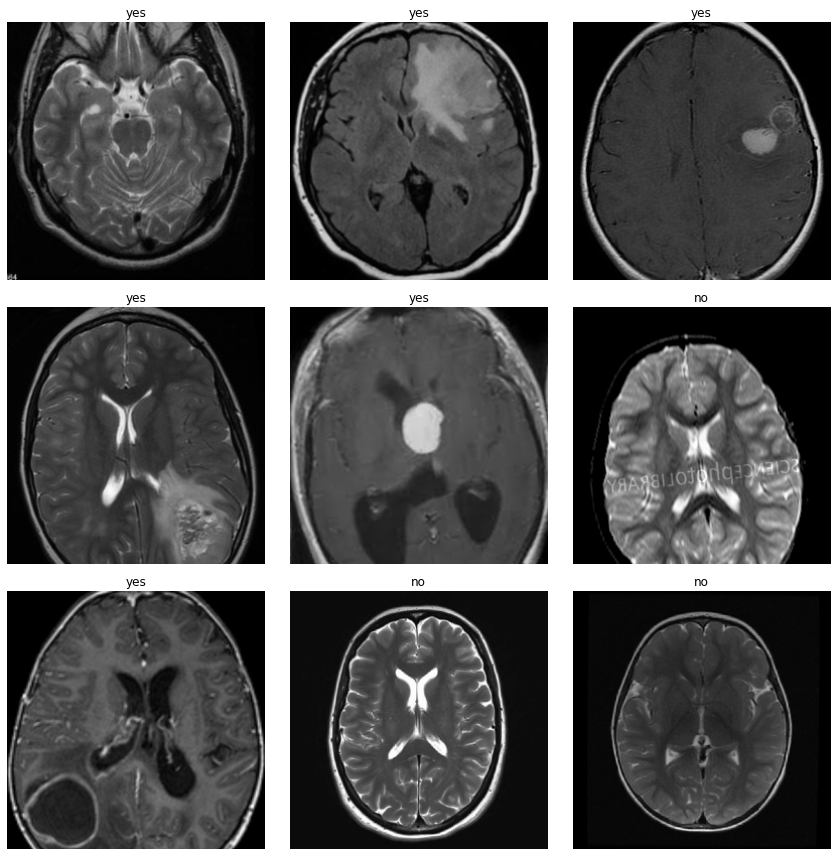

In [54]:
data.show_batch(rows=3)

In [19]:
arch = models.resnet50

In [27]:
learn = cnn_learner(data, arch, metrics=accuracy)

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


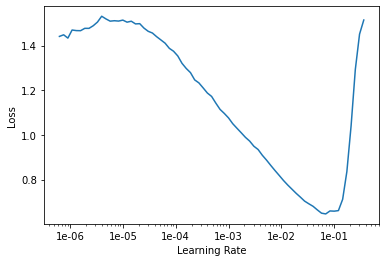

In [30]:
learn.recorder.plot()

In [31]:
lr = 5e-4

In [32]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.430574,0.829627,0.580000,00:02
1,1.117038,0.724111,0.640000,00:02
2,0.889908,0.979600,0.660000,00:01
3,0.759709,0.898131,0.740000,00:02
4,0.657059,0.811345,0.780000,00:01


In [33]:
learn.save('stage-1')

In [34]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


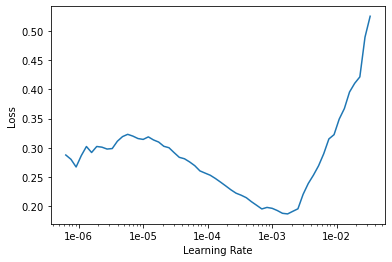

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.259009,0.714669,0.800000,00:02
1,0.257922,0.605037,0.860000,00:02
2,0.252374,0.546787,0.880000,00:02
3,0.222611,0.513179,0.920000,00:02
4,0.204739,0.488884,0.920000,00:02


In [38]:
learn.save('stage-2')

In [47]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (203 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
no,no,no,no,no
Path: images;

Valid: LabelList (50 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
no,yes,yes,no,yes
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel

In [50]:
learn.export('stage-2')

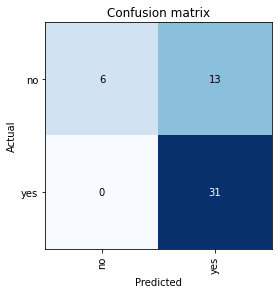

In [51]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

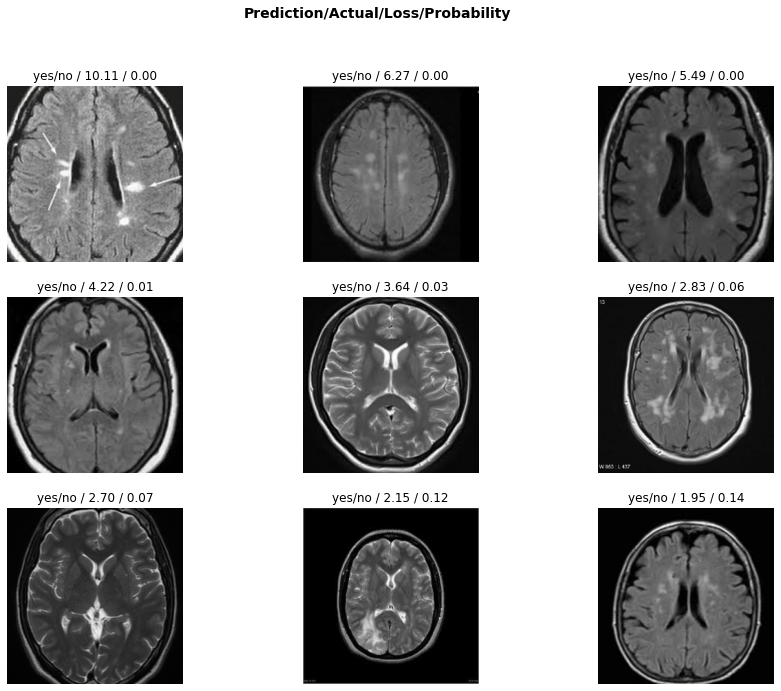

In [52]:
interp.plot_top_losses(9, figsize=(15,11))